In [1]:
%matplotlib inline
import numpy as np
import adi
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import max_len_seq
from scipy import fftpack
import time
import random



In [2]:

data_I = []
data_Q = []
sync = "111111111111111111111111111111"
hello = "0100100001100101011011000110110001101111001000000101011101101111011100100110110001100100"
N = len(hello)
message = sync + hello
print("message: ", len(message))
print(message)

def modulate_bpsk(bit_string):
    complex_array = np.array([], dtype = complex)
    n = int(len(bit_string))
    complex_array.resize( int(len(bit_string)) ) 
    i = 0
    while(n != 0):
        if(bit_string[i] =='1'):
            real = 1
            imag = 0
        else:
            real = -1
            imag = 0
        complex_array[i] = complex(real, imag)
        n -= 1
        i += 1

    return complex_array
def demod_bpsk(iq):
    bitarray = []
    m = len(iq)
    i = 0
    while(m != 0):
        if(iq[i].real >= 0 ):
            bitarray.append(1)
        else:
            bitarray.append(0)
        m -= 1
        i += 1
    return bitarray


print(len(message))
data_to_transmit = modulate_bpsk(message)
print(data_to_transmit)

message:  118
1111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100
118
[ 1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j
  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j
 -1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j
 -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j -1.+0.j
  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j -1.+0.j
  1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j -1.+0.j  1.+0.j -1.+0.j
  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j
  1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.+0.j  1.+0.j  1.+0.j -1.+0.j
 -1.+0.j  1.+0.j -1.+0.j -1.+0.j  1.+0.j  1.+0.j -1.+0.j  1.

In [3]:
sample_rate = 1e6 # Hz ширина полосы
center_freq = 2200e6# Hz
num_samps = 20000 # number of samples per call to rx()

sdr = adi.Pluto("ip:192.168.3.1")
sdr.sample_rate = int(sample_rate)

# Config Rx
sdr.rx_lo = int(center_freq)
sdr.rx_buffer_size = num_samps
sdr.gain_control_mode_chan0 = 'manual' #fast_attack, slow_attack
sdr.rx_hardwaregain_chan0 = 5.0 # dB, increase to increase the receive gain, but be careful not to saturate the ADC
sdr.tx_lo = int(center_freq)
sdr.tx_cyclic_buffer = True
sdr.loopback = 0

tx_iq = (2**14)*data_to_transmit
sdr.tx(tx_iq)


0000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111

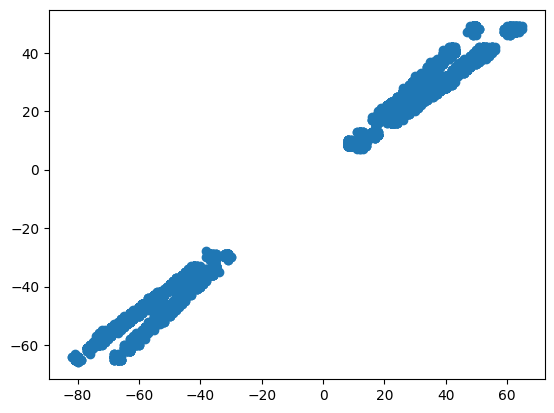

1111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111

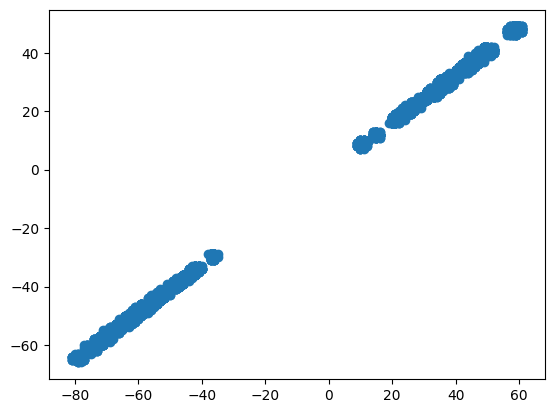

0100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111

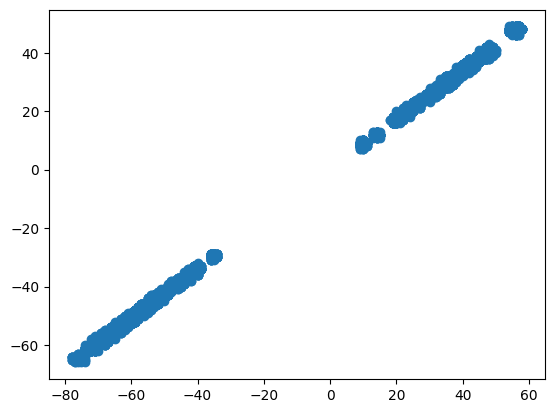

1111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101

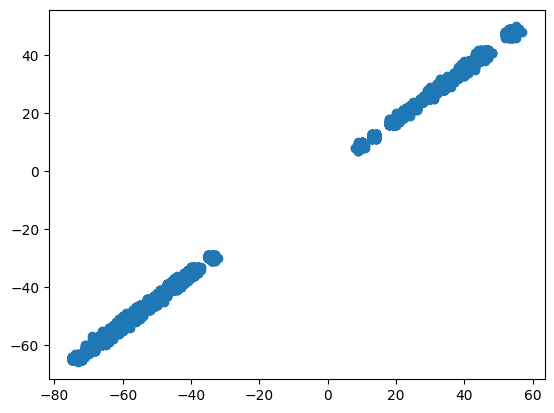

0111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111

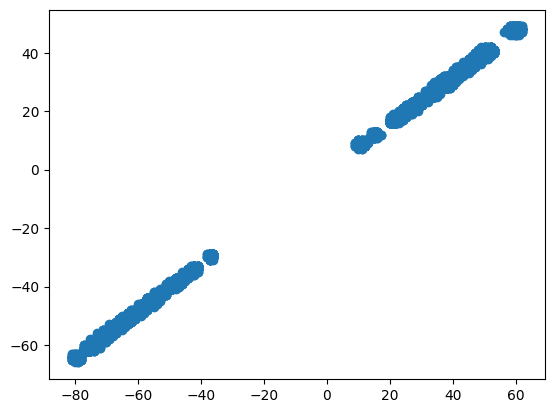

1110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010

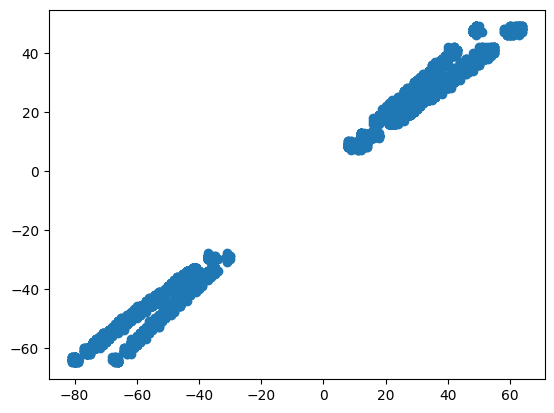

0100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011

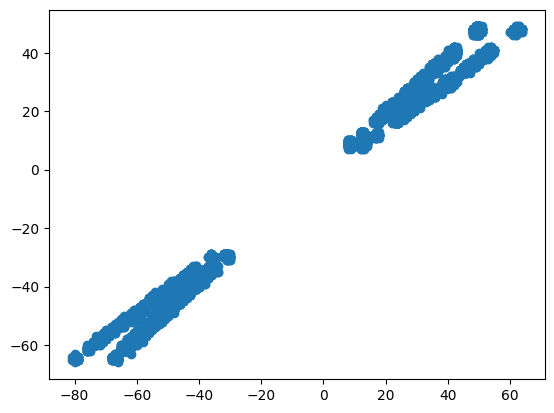

0110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100

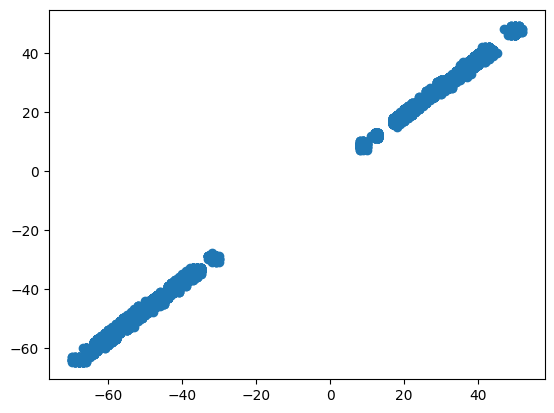

1100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011

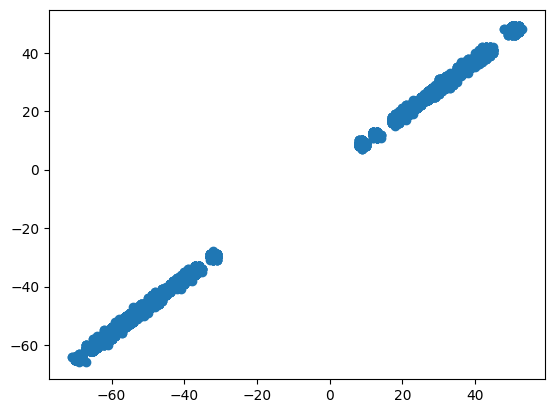

1111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011011000110111100100000010101110110111101110010011011000110010011111111111111111111111111111101001000011001010110110001101100011011110010000001010111011011110111001001101100011001001111111111111111111111111111110100100001100101011011000110110001101111001000000101011101101111011100100110110001100100111111111111111111111111111111010010000110010101101100011

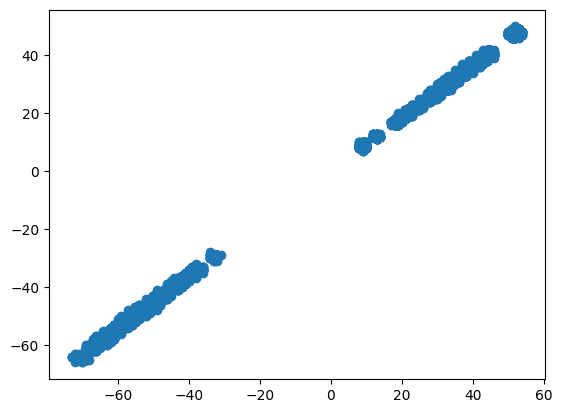

In [4]:
x = 10
while(x != 0):
    rx = sdr.rx()
    demod = demod_bpsk(rx*np.exp(-1j*np.pi/4))
    str_data = ""
    for i in demod:
        str_data += str(i)
    index = str_data.find(hello)
    print(str_data)
    if(index != -1):
        hello_back = "10010001100101110110011011001101111"
        tx_iq = modulate_bpsk(hello_back)
        tx_iq *= 2**14
        sdr.tx(tx_iq)
        print(demod)
        print("Hello World")
    plt.clf()
    plt.scatter(rx.real, rx.imag)
    plt.draw()
    plt.pause(0.05)
    time.sleep(0.1)
    x -= 1


In [5]:
print(hello)
print(("0110111100110101001001110010011100100001101111110101000100100001000110110010011100110")[::-1])

0100100001100101011011000110110001101111001000000101011101101111011100100110110001100100
0110011100100110110001000010010001010111111011000010011100100111001001010110011110110


In [7]:
sdr.rx_destroy_buffer()
sdr.tx_destroy_buffer()